# Demo for D-Wave in Braket: Antenna Simulation (con QUBO como opcion)

Reutilizo el ejemplo de bracket de Maximun Cut para probar que se puede poner otra cosa de D-Wave casi sin tocar. Para ejecutar en Notebook de Braket

El ejemplo de D-Wave es el de antenna simulation


Import de las cosas necesarias de AWS Braket

In [1]:
import json
from braket.aws import AwsDevice
from braket.ocean_plugin import BraketSampler, BraketDWaveSampler

Import de pintadores y de las librerias de DWave

In [1]:
import matplotlib.pyplot as plt
# magic word for producing visualizations in notebook
%matplotlib inline
import networkx as nx
import dwave_networkx as dnx
from dwave.system.composites import EmbeddingComposite
# En caso de querer usar el simulador de Annealing
import neal # Para el simulador


Variables para Braket para dejar los resultados en S3

__NOTE__: Please enter your S3 bucket and key below. 

In [3]:
# Please enter the S3 bucket you created during onboarding in the code below
my_bucket = f"amazon-braket-amazon-braket-fernando" # the name of the bucket
my_prefix = "DwaverTest" # the name of the folder in the bucket
s3_folder = (my_bucket, my_prefix)

In [4]:
# session and device
device = AwsDevice("arn:aws:braket:::device/qpu/d-wave/DW_2000Q_6")
print('Device:', device)

Device: Device('name': DW_2000Q_6, 'arn': arn:aws:braket:::device/qpu/d-wave/DW_2000Q_6)


## DEFINIR EL ANTENNA SIMULADOR

Definimos el graph de las antenas

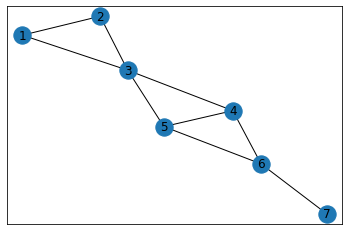

In [5]:
# Create empty graph
G = nx.Graph()

# Add edges to graph - this also adds the nodes
G.add_edges_from([(1, 2), (1, 3), (2, 3), (3, 4), (3, 5), (4, 5), (4, 6), (5, 6), (6, 7)])

# Visualize the original graph
pos = nx.spring_layout(G)
plt.figure()
nx.draw_networkx(G, pos=pos, with_labels=True)
plt.show()


Invocamos el sampler de Braket con el graph solver independent set y se da la solucion

In [6]:
###sampler = BraketDWaveSampler(s3_folder,'arn:aws:braket:::device/qpu/d-wave/DW_2000Q_6')
###sampler = EmbeddingComposite(sampler)

sampler = neal.SimulatedAnnealingSampler() # Usando el simulador

# Find the maximum independent set, S
S = dnx.maximum_independent_set(G, sampler=sampler, num_reads=10)

# Print the solution for the user
print('Maximum independent set size found is', len(S))
print(S)

Maximum independent set size found is 3
[2, 5, 7]


Pintamos los resultados

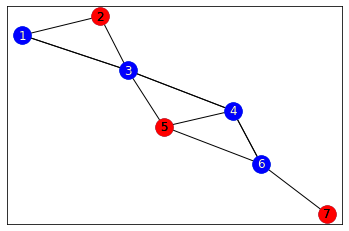

In [7]:

# Visualize the results
k = G.subgraph(S)
notS = list(set(G.nodes()) - set(S))
othersubgraph = G.subgraph(notS)
plt.figure()
nx.draw_networkx(G, pos=pos, with_labels=True)
nx.draw_networkx(k, pos=pos, with_labels=True, node_color='r', font_color='k')
nx.draw_networkx(othersubgraph, pos=pos, with_labels=True, node_color='b', font_color='w')
plt.show()


In [ ]:
'''
Codigo original para guardar los dibujos

# Save original problem graph
original_name = "antenna_plot_original.png"
nx.draw_networkx(G, pos=pos, with_labels=True)
plt.savefig(original_name, bbox_inches='tight')

# Save solution graph
# Note: red nodes are in the set, blue nodes are not
solution_name = "antenna_plot_solution.png"
nx.draw_networkx(k, pos=pos, with_labels=True, node_color='r', font_color='k')
nx.draw_networkx(othersubgraph, pos=pos, with_labels=True, node_color='b', font_color='w')
plt.savefig(solution_name, bbox_inches='tight')

print("Your plots are saved to {} and {}".format(original_name, solution_name))
'''

Opcion de pasarlo a QUBO

In [8]:
#### Vamos a pasarlo a Qubo y ha ver si funciona
Q = dnx.algorithms.independent_set.maximum_weighted_independent_set_qubo(G)
#Q = dnx.maximum_weighted_independent_set_qubo(G, weight='weight', lagrange=2.0)

print(Q)

###
###sampler = EmbeddingComposite(DWaveSampler())

###sampler = neal.SimulatedAnnealingSampler() # Usando el simulador

# Usando el sampler tal cual en el curso
S = sampler.sample_qubo(Q)
print(S)

{(1, 1): -1.0, (2, 2): -1.0, (3, 3): -1.0, (4, 4): -1.0, (5, 5): -1.0, (6, 6): -1.0, (7, 7): -1.0, (1, 2): 2.0, (1, 3): 2.0, (2, 3): 2.0, (3, 4): 2.0, (3, 5): 2.0, (4, 5): 2.0, (4, 6): 2.0, (5, 6): 2.0, (6, 7): 2.0}
   1  2  3  4  5  6  7 energy num_oc.
0  1  0  0  1  0  0  1   -3.0       1
['BINARY', 1 rows, 1 samples, 7 variables]
